In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F
from scipy import constants
import pandas as pd
#plt.rcParams['text.usetex'] = True

from scipy.stats import binned_statistic_2d
import plotly.graph_objects as go

Welcome to JupyROOT 6.22/09


In [3]:
f = TFile("selectedEventsReco_v2me06_072924_withTruth.root","READ")
t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

3066


In [4]:
muMom_list = []
piMom_list = []
lPMom_list = []

recoPiMom_list = []
recoMuMom_list = []
recoLPMom_list = []
weights_list = []

# collect event entries that had no -1's
passedIndices_list = []

#hpT = TH1F( 'hpT', 'This is the truth distribution', 100, -1, 2 )
#hpR = TH1F( 'hpR', 'This is the reco distribution', 100, -1, 2 )

for e in range(entries):

    t.GetEntry(e)
    
    #hpT.Fill( (t.muonMom_)/1000. )
    #hpR.Fill( (t.recoMomMu_) )
    
    #print("Reco muonMom, pionMom, lPmom: ", t.recoMomMu_, ",  ", t.recoMomPi_, ", ", t.recoMomP_)
    
    muMom_list.append(t.truthMuonMom_)
    piMom_list.append(t.truthPionMom_)
    lPMom_list.append(t.truthLProtonMom_)
    
    recoMuMom_list.append(t.recoMomMu_)
    recoPiMom_list.append(t.recoMomPi_)
    recoLPMom_list.append(t.recoMomP_)
    
    weights_list.append(t.weight_)
    
    if (t.recoMomMu_ != -1) and (t.recoMomPi_ != -1) and (t.recoMomP_ != -1 ):
        #print("This one passed! Appending entry...")
        passedIndices_list.append( e )
        
    
muMom_arr = np.asarray(muMom_list)
piMom_arr = np.asarray(piMom_list)
lPMom_arr = np.asarray(lPMom_list)

recoMuMom_arr = np.asarray(recoMuMom_list)
recoPiMom_arr = np.asarray(recoPiMom_list)
recoLPMom_arr = np.asarray(recoLPMom_list)

weights_arr = np.asarray(weights_list)

#convert truth from mev to gev
#muMom_arr = muMom_arr / 1000.

#print("len(muMom_list)", len(muMom_list))
#print("len(recoMuMom_list)", len(recoMuMom_list))

#print("truth muMom_arr: ", muMom_arr)
#print("truth muMom_arr.shape: ", muMom_arr.shape)

print("recoMuMom_arr: ", recoMuMom_arr)
print("recoMuMom_arr.shape: ", recoMuMom_arr.shape)

print("This is how many events had all 3 particles reconstructed: ", len(passedIndices_list))
#print("The indices are: ", passedIndices_list)

recoMuMom_arr:  [0.41491445 0.14621555 0.26068203 ... 0.28078248 0.24077801 0.06025061]
recoMuMom_arr.shape:  (3066,)
This is how many events had all 3 particles reconstructed:  3066


In [5]:
# grab only events that had all 3 particles reconstructed 

passedTruthMomMu_list = []
passedTruthMomPi_list = []
passedTruthMomLP_list = []
passedRecoMomMu_list = []
passedRecoMomPi_list = []
passedRecoMomLP_list = []

passedWeights_list = []

passedTruthMomMuContained_list = []
passedTruthMomPiContained_list = []
passedTruthMomLPContained_list = []
passedRecoMomMuContained_list = []
passedRecoMomPiContained_list = []
passedRecoMomLPContained_list = []

passedWeightsContained_list = []

for e in range(entries):

    t.GetEntry(e)
    
    if (e in passedIndices_list):
        
        passedTruthMomMu_list.append(t.truthMuonMom_)
        passedTruthMomPi_list.append(t.truthPionMom_)
        passedTruthMomLP_list.append(t.truthLProtonMom_)
        
        passedRecoMomMu_list.append(t.recoMomMu_)
        passedRecoMomPi_list.append(t.recoMomPi_)
        passedRecoMomLP_list.append(t.recoMomP_)
        
        passedWeights_list.append(t.weight_)
        
        # checks if the entire neutrino intrxn event was contained (event-level)
        if (t.recoContained_==2):
            
            passedTruthMomMuContained_list.append(t.truthMuonMom_)
            passedTruthMomPiContained_list.append(t.truthPionMom_)
            passedTruthMomLPContained_list.append(t.truthLProtonMom_)
            
            passedRecoMomMuContained_list.append(t.recoMomMu_)
            passedRecoMomPiContained_list.append(t.recoMomPi_)
            passedRecoMomLPContained_list.append(t.recoMomP_)
            
            passedWeightsContained_list.append(t.weight_)
        
print("This is the passedRecoMomPi_list size: ", len(passedRecoMomPi_list))
print("This is the passedRecoMomPiContained_list size: ", len(passedRecoMomPiContained_list))

passedTruthMomMu_arr = np.asarray(passedTruthMomMu_list)
passedTruthMomPi_arr = np.asarray(passedTruthMomPi_list)
passedTruthMomLP_arr = np.asarray(passedTruthMomLP_list)
passedRecoMomMu_arr = np.asarray(passedRecoMomMu_list)
passedRecoMomPi_arr = np.asarray(passedRecoMomPi_list)
passedRecoMomLP_arr = np.asarray(passedRecoMomLP_list)
passedWeights_arr = np.asarray(passedWeights_list)

passedTruthMomMuContained_arr = np.asarray(passedTruthMomMuContained_list)
passedTruthMomPiContained_arr = np.asarray(passedTruthMomPiContained_list)
passedTruthMomLPContained_arr = np.asarray(passedTruthMomLPContained_list)
passedRecoMomMuContained_arr = np.asarray(passedRecoMomMuContained_list)
passedRecoMomPiContained_arr = np.asarray(passedRecoMomPiContained_list)
passedRecoMomLPContained_arr = np.asarray(passedRecoMomLPContained_list)
passedWeightsContained_arr = np.asarray(passedWeightsContained_list)

#print(passedTruthMomMu_arr)

# convert mev to gev
#passedTruthMomMu_arr = passedTruthMomMu_arr / 1000
#passedTruthMomPi_arr = passedTruthMomPi_arr / 1000
#passedTruthMomLP_arr = passedTruthMomLP_arr / 1000
#passedRecoMomMu_arr = passedRecoMomMu_arr / 1000
#passedRecoMomPi_arr = passedRecoMomPi_arr / 1000
#passedRecoMomLP_arr = passedRecoMomLP_arr / 1000

#passedTruthMomMuContained_arr = passedTruthMomMuContained_arr / 1000
#passedTruthMomPiContained_arr = passedTruthMomPiContained_arr / 1000
#passedTruthMomLPContained_arr = passedTruthMomLPContained_arr / 1000
#passedRecoMomMuContained_arr = passedRecoMomMuContained_arr / 1000
#passedRecoMomPiContained_arr = passedRecoMomPiContained_arr / 1000
#passedRecoMomLPContained_arr = passedRecoMomLPContained_arr / 1000

#print(passedTruthMomMu_arr)
print(passedRecoMomMu_arr)

#print(passedTruthMomPi_arr)
print(passedRecoMomPi_arr)

This is the passedRecoMomPi_list size:  3066
This is the passedRecoMomPiContained_list size:  1273
[0.41491445 0.14621555 0.26068203 ... 0.28078248 0.24077801 0.06025061]
[0.15690489 0.11594611 0.11741008 ... 0.21854073 0.22023774 0.18038409]


In [6]:
# POT scaling for events that passed reco only

targetPOT = 1.3e21
sumPOT = 4.68e20 # this is for run 1
#sumPOT = 8.98e20 # this is for run 3

scale = targetPOT / sumPOT
print("Scale is: ", scale)

print("passedWeights_arr", passedWeights_arr)

print(np.sum(passedWeights_arr))
totalEvents = np.sum(passedWeights_arr)*scale
print("totalEvents: ", totalEvents)

print(np.sum(passedWeightsContained_arr))
totalEventsContained = np.sum(passedWeightsContained_arr)*scale
print("totalEvents (contained): ", totalEventsContained)

Scale is:  2.7777777777777777
passedWeights_arr [1. 1. 1. ... 1. 1. 1.]
3057.6285083615985
totalEvents:  8493.412523226662
1269.3632820506593
totalEvents (contained):  3526.009116807387


## Muons

In [13]:
# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomMu_arr)
maxReco = np.max(passedRecoMomMu_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMu_arr)
minReco = np.min(passedRecoMomMu_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

<IPython.core.display.Javascript object>


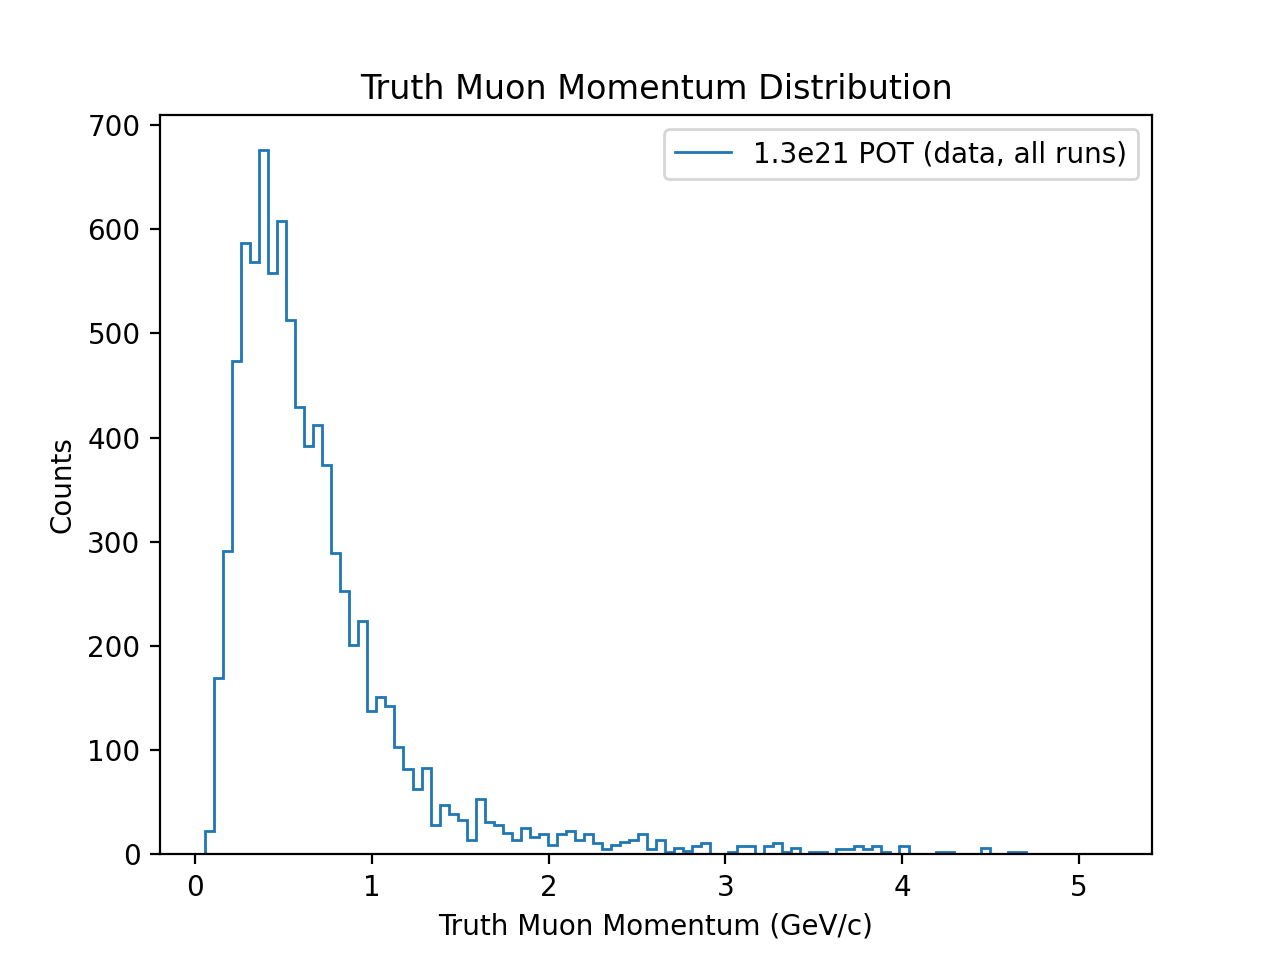

3057.6285083615985
8493.412523226662


In [14]:
# plotting only events that passed
# truth muon mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

countsTruMu, binsTruMu = np.histogram(passedTruthMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsTru = countsTruMu*scale

print(sum(countsTruMu))
print(sum(scaledCountsTru))

plt.stairs(scaledCountsTru, binsTruMu, label="1.3e21 POT (data, all runs)")
#plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")


plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


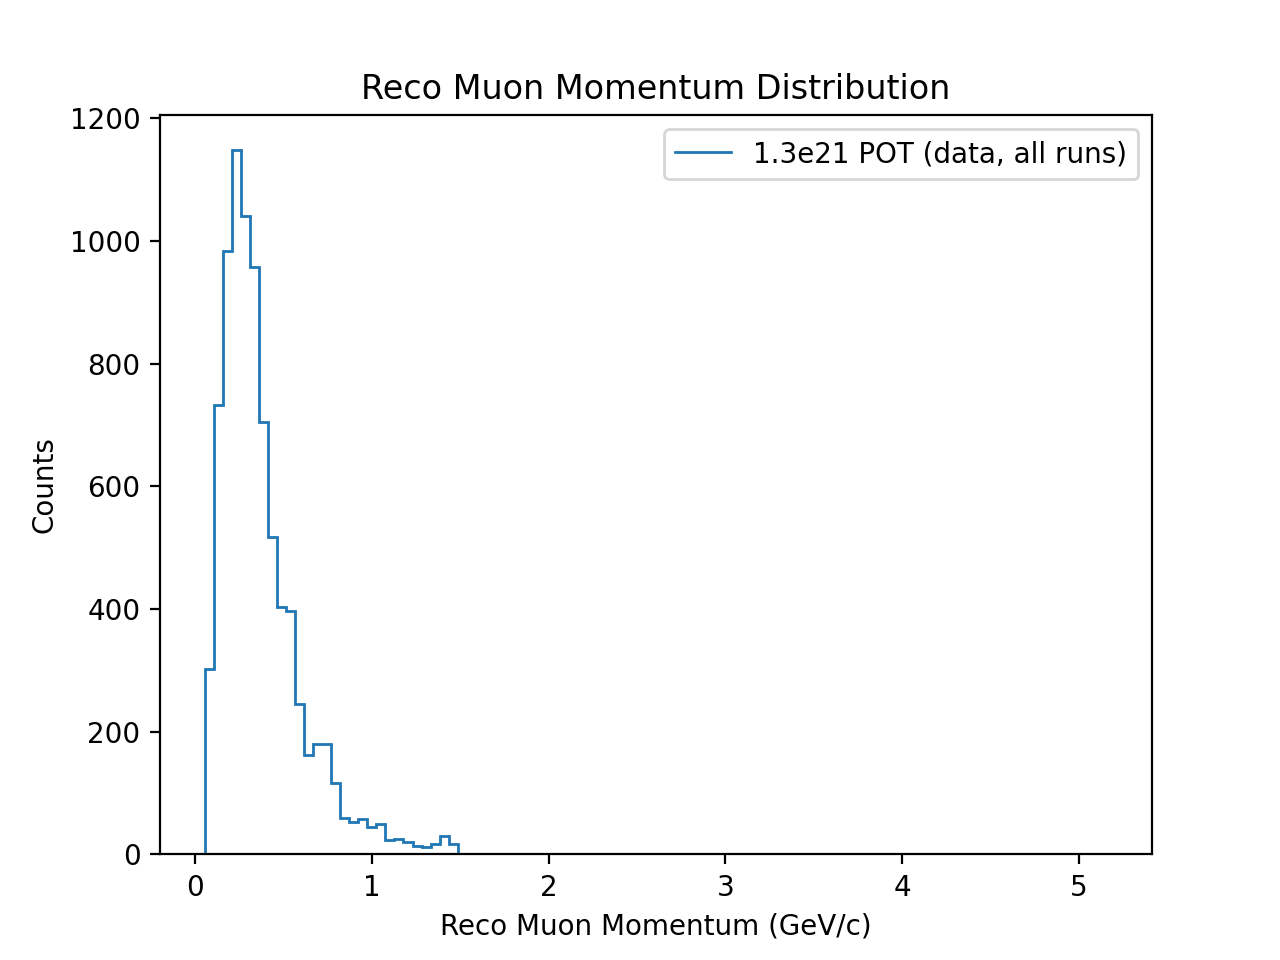

counts:  [109.05243792 263.75232506 353.8301919  413.13789332 374.4465062
 344.809348   254.02144467 186.09895601 144.96238773 142.94230988
  88.36311175  58.35325078  65.05949363  64.82327895  42.
  21.16254659  19.18318117  21.          16.00023251  18.
   8.17207384   9.04580748   7.           5.           4.15874898
   6.          11.           6.25298202   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.         

In [15]:
# plotting only events that passed
# reco muon mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

countsMu, binsMu = np.histogram(passedRecoMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsMu = countsMu*scale

print("counts: ", countsMu)
print("scaledCountsMu: ", scaledCountsMu)

print(sum(countsMu))
print(sum(scaledCountsMu))


plt.stairs(scaledCountsMu, binsMu, label="1.3e21 POT (data, all runs)")
#plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


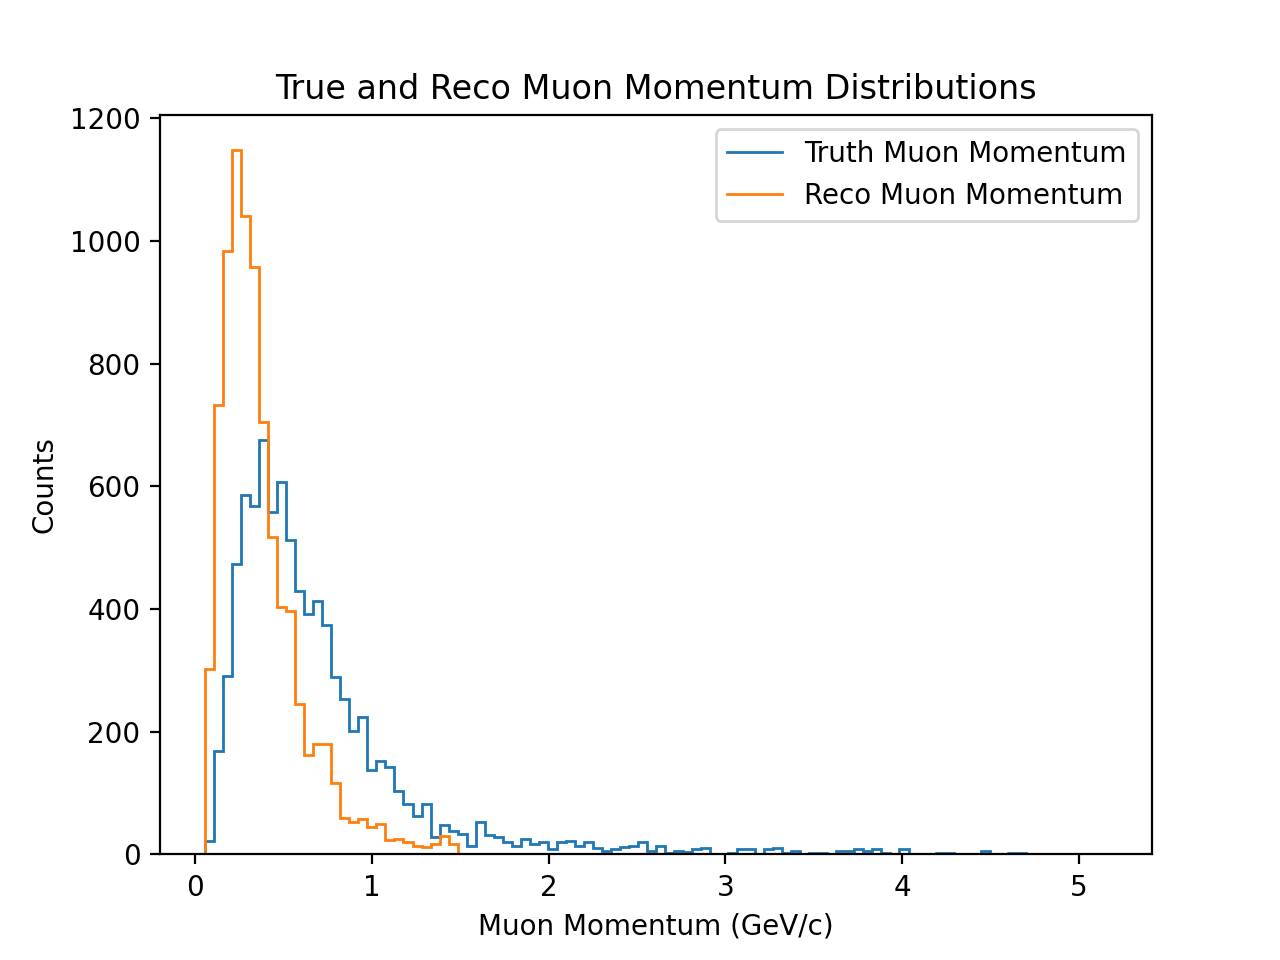

max value of truth:  5.157307286411889
max value of reco:  1.4672413483645894
maxRange:  5.157307286411889
truth bins:  [0.05676003 0.1077655  0.15877097 0.20977644 0.26078192 0.31178739
 0.36279286 0.41379833 0.46480381 0.51580928 0.56681475 0.61782023
 0.6688257  0.71983117 0.77083664 0.82184212 0.87284759 0.92385306
 0.97485853 1.02586401 1.07686948 1.12787495 1.17888042 1.2298859
 1.28089137 1.33189684 1.38290231 1.43390779 1.48491326 1.53591873
 1.5869242  1.63792968 1.68893515 1.73994062 1.79094609 1.84195157
 1.89295704 1.94396251 1.99496799 2.04597346 2.09697893 2.1479844
 2.19898988 2.24999535 2.30100082 2.35200629 2.40301177 2.45401724
 2.50502271 2.55602818 2.60703366 2.65803913 2.7090446  2.76005007
 2.81105555 2.86206102 2.91306649 2.96407196 3.01507744 3.06608291
 3.11708838 3.16809386 3.21909933 3.2701048  3.32111027 3.37211575
 3.42312122 3.47412669 3.52513216 3.57613764 3.62714311 3.67814858
 3.72915405 3.78015953 3.831165   3.88217047 3.93317594 3.98418142
 4.03518689

In [12]:
# muon truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomMu_arr)
maxReco = np.max(passedRecoMomMu_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMu_arr)
minReco = np.min(passedRecoMomMu_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(passedRecoMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Muon Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Muon Momentum")

plt.xlabel('Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Muon Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


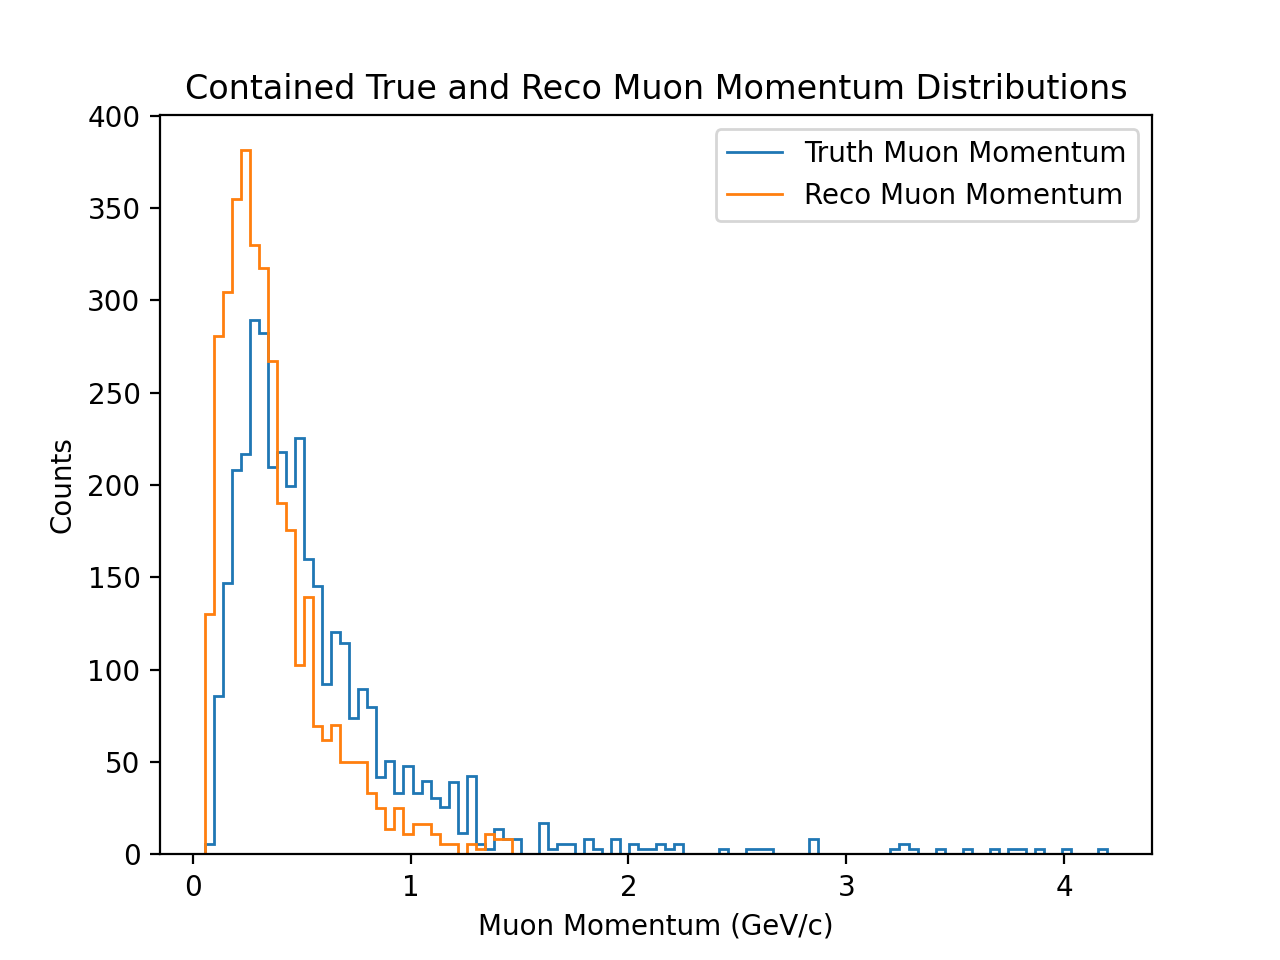

max value of truth:  4.196037746515399
max value of reco:  1.4634653349851234
maxRange:  4.196037746515399
1269.3632820506596
3526.009116807389
1269.3632820506596
3526.0091168073886


In [16]:
# contained muon truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomMuContained_arr)
maxReco = np.max(passedRecoMomMuContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMuContained_arr)
minReco = np.min(passedRecoMomMuContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomMuContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print(sum(countsTrue))
print(sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomMuContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Muon Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Muon Momentum")

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.xlabel('Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Muon Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# muons 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomMu_arr, passedRecoMomMu_arr, bins = 50)
#h = ax.hist2d(passedTruthMomMu_arr, passedRecoMomMu_arr, bins = 50, weights=passedWeights_arr)
plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Reco Muon Momentum (GeV/c)')
plt.title('Muon Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

In [ ]:
# contained muons 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomMuContained_arr, passedRecoMomMuContained_arr, bins = 50)
plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Reco Muon Momentum (GeV/c)')
plt.title('Contained Muon Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

## Pions

In [ ]:
# plotting only events that passed
# truth pion mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedTruthMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print(sum(counts))
print(sum(scaledCounts))

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Pion Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(counts))
print(sum(scaledCounts))

In [ ]:
# plotting only events that passed
# reco pion mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

countsPi, binsPi = np.histogram(passedRecoMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCounts = countsPi*scale

print(sum(countsPi))
print(sum(scaledCounts))

plt.stairs(scaledCounts, binsPi, label="1.3e21 POT (data, all runs)")
#plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Pion Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


print(sum(countsPi))
print(sum(scaledCounts))

In [ ]:
# pion truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomPi_arr)
maxReco = np.max(passedRecoMomPi_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomPi_arr)
minReco = np.min(passedRecoMomPi_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#------------

countsTrue, binsTrue = np.histogram(passedTruthMomPi_arr, bins=numberBins, range=binEdgeRange, weights=passedWeights_arr)
#countsTrue, binsTrue = np.histogram(passedTruthMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCountsTrue = countsTrue*scale

print("Bins truth: ", binsTrue)


print(sum(countsTrue))
print(sum(scaledCountsTrue))

#countsReco, binsReco = np.histogram(passedRecoMomPi_arr, bins=binsTrue, weights=passedWeights_arr)
countsReco, binsReco = np.histogram(passedRecoMomPi_arr, bins=numberBins, range=binEdgeRange, weights=passedWeights_arr)
scaledCountsReco = countsReco*scale

print("Bins reco: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Pion Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Pion Momentum")
#plt.stairs(countsPi, binsTrue, label="TEST")


plt.xlabel('Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Pion Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# contained pion truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomPiContained_arr)
maxReco = np.max(passedRecoMomPiContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomPiContained_arr)
minReco = np.min(passedRecoMomPiContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#------------
countsTrue, binsTrue = np.histogram(passedTruthMomPiContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print(sum(countsTrue))
print(sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomPiContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Pion Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Pion Momentum")

plt.xlabel('Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Pion Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# pion 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomPi_arr, passedRecoMomPi_arr, bins = 50, range=[[0.,1.0],[0., 1.0]])
plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Reco Pion Momentum (GeV/c)')
plt.title('Pion Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

In [ ]:
# contained pion 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomPiContained_arr, passedRecoMomPiContained_arr, bins = 50, range=[[0.,1.0],[0., 1.0]])
plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Reco Pion Momentum (GeV/c)')
plt.title('Contained Pion Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

## Leading Protons

In [ ]:
# plotting only events that passed
# truth leading proton mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedTruthMomLP_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale
print(scale)

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Leading Proton Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(counts))
print(sum(scaledCounts))

In [ ]:
# plotting only events that passed
# reco leading proton mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

countsP, binsP = np.histogram(passedRecoMomLP_arr, bins=100, weights=passedWeights_arr)
scaledCounts = countsP*scale
print(scale)

plt.stairs(scaledCounts, binsP, label="1.3e21 POT (data, all runs)")
#plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Leading Proton Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(countsP))
print(sum(scaledCounts))

In [ ]:
# leading proton truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomLP_arr)
maxReco = np.max(passedRecoMomLP_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomLP_arr)
minReco = np.min(passedRecoMomLP_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#----------------

countsTrue, binsTrue = np.histogram(passedTruthMomLP_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("binsTruth", binsTrue)
print("sum bins truth: ", sum(countsTrue))
print("sum scaled bins truth: ", sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomLP_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("binsReco", binsReco)
print("sum bins reco: ", sum(countsReco))
print("sum scaled bins reco: ", sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Leading Proton Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Leading Proton Momentum")

print(all(binsTrue == binsReco))

plt.xlabel('Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Leading Proton Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# contained leading proton truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomLPContained_arr)
maxReco = np.max(passedRecoMomLPContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomLPContained_arr)
minReco = np.min(passedRecoMomLPContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#----------------

countsTrue, binsTrue = np.histogram(passedTruthMomLPContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("binsTruth", binsTrue)
print("sum bins truth: ", sum(countsTrue))
print("sum scaled bins truth: ", sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomLPContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("binsReco", binsReco)
print("sum bins reco: ", sum(countsReco))
print("sum scaled bins reco: ", sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Leading Proton Momentum")
plt.stairs(scaledCountsReco, binsTrue, label="Reco Leading Proton Momentum")

plt.xlabel('Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Leading Proton Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# leading proton 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomLP_arr, passedRecoMomLP_arr, bins = 50, range=[[0.,2.0],[0., 2.0]])
plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Reco Leading Proton Momentum (GeV/c)')
plt.title('Leading Proton Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

In [ ]:
# contained leading proton 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomLPContained_arr, passedRecoMomLPContained_arr, bins = 50, range=[[0.,2.0],[0., 2.0]])
plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Reco Leading Proton Momentum (GeV/c)')
plt.title('Contained Leading Proton Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()